In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df=pd.read_csv('C:\Programming\ML/Walmart_Store_sales.csv')

In [3]:
#first five instances of the dataset
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
#checking the null values in dataset
df.isnull().sum().any()

False

In [5]:
#checking the duplicate values in dataset
df.duplicated().any()

False

In [6]:
#checking the type of the features and response 
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [7]:
df['Weekly_Sales']=df['Weekly_Sales'].astype(int)
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125,0,56.47,3.969,192.330854,8.667


# Which store has maximum sales



In [8]:
maximum_sales=df.groupby('Store')['Weekly_Sales'].sum().reset_index(name='Total_Sales')
maximum_sales.sort_values(by='Total_Sales',ascending=False).head(1)
#store no.20 as the maximum sales 

,Store,Total_Sales
19,20,301397719


# Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [9]:
maximum_std=pd.pivot_table(df,index='Store',values='Weekly_Sales',aggfunc=['mean','std'])
maximum_std.sort_values(by=[('std','Weekly_Sales')],ascending=False).head(1)
#Store 14 has maximum std 

,mean,std
,Weekly_Sales,Weekly_Sales
Store,,
14,2.020978e+06,317569.927617


In [10]:
maximum_std=pd.pivot_table(df,index='Store',values='Weekly_Sales',aggfunc=['mean','std'])
maximum_std.head(5)

,mean,std
,Weekly_Sales,Weekly_Sales
Store,,
1,1.555264e+06,155980.743379
2,1.925751e+06,237683.660931
3,4.027040e+05,46319.654141
4,2.094712e+06,266201.454054
5,3.180113e+05,37737.989892


# Which store/s has good quarterly growth rate in Q3’2012

In [11]:
df['quarter'] = pd.PeriodIndex(df.Date, freq='Q')

In [12]:
max_q3=(df[df['quarter']=='2012Q3'].groupby(['Store','quarter']).sum())
max_q3.sort_values(by='Weekly_Sales',ascending=False).head(1)
#Store 4 has good quaterly growth rate 

,,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,quarter,,,,,,
4,2012Q3,25652113,1,893.44,42.553,1570.21296,49.685


In [13]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,quarter
0,1,05-02-2010,1643690,0,42.31,2.572,211.096358,8.106,2010Q2
1,1,12-02-2010,1641957,1,38.51,2.548,211.242170,8.106,2010Q4
2,1,19-02-2010,1611968,0,39.93,2.514,211.289143,8.106,2010Q1
3,1,26-02-2010,1409727,0,46.63,2.561,211.319643,8.106,2010Q1
4,1,05-03-2010,1554806,0,46.50,2.625,211.350143,8.106,2010Q2
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173,0,64.88,3.997,192.013558,8.684,2012Q3
6431,45,05-10-2012,733455,0,64.89,3.985,192.170412,8.667,2012Q2
6432,45,12-10-2012,734464,0,54.47,4.000,192.327265,8.667,2012Q4
6433,45,19-10-2012,718125,0,56.47,3.969,192.330854,8.667,2012Q4


# Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

<AxesSubplot:>

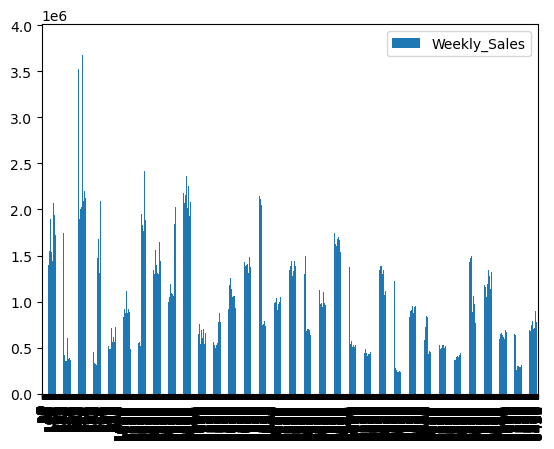

In [14]:
df[df['Holiday_Flag']==0].plot(y=['Weekly_Sales'],kind='bar')

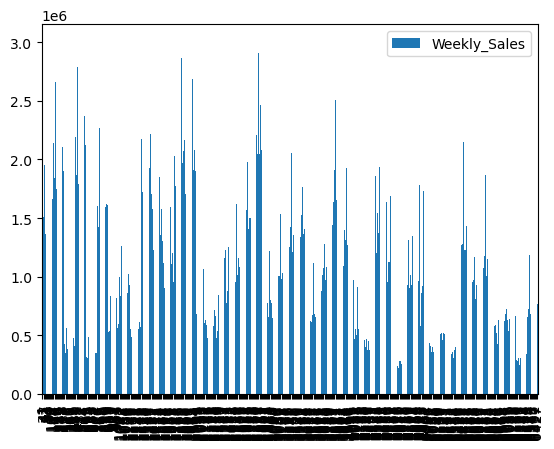

In [15]:
df[df['Holiday_Flag']==1].plot(y=['Weekly_Sales'],kind='bar').plot()
plt.show()

In [58]:
holiday_week=df[df['Holiday_Flag']==1]
nonholiday_week=df[df['Holiday_Flag']==0]

In [56]:
#parsing the date column into datetime
df['Date']=pd.to_datetime(df['Date'])

In [57]:
nonholiday_week

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,quarter
0,1,05-02-2010,1643690,0,42.31,2.572,211.096358,8.106,2010Q2
2,1,19-02-2010,1611968,0,39.93,2.514,211.289143,8.106,2010Q1
3,1,26-02-2010,1409727,0,46.63,2.561,211.319643,8.106,2010Q1
4,1,05-03-2010,1554806,0,46.50,2.625,211.350143,8.106,2010Q2
5,1,12-03-2010,1439541,0,57.79,2.667,211.380643,8.106,2010Q4
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173,0,64.88,3.997,192.013558,8.684,2012Q3
6431,45,05-10-2012,733455,0,64.89,3.985,192.170412,8.667,2012Q2
6432,45,12-10-2012,734464,0,54.47,4.000,192.327265,8.667,2012Q4
6433,45,19-10-2012,718125,0,56.47,3.969,192.330854,8.667,2012Q4


In [59]:
holiday_week

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,quarter,Month,Semester
1,1,2010-12-02,1641957,1,38.51,2.548,211.242170,8.106,2010Q4,2010-12,2010-12
31,1,2010-10-09,1507460,1,78.69,2.565,211.495190,7.787,2010Q4,2010-10,2010-10
42,1,2010-11-26,1955624,1,64.52,2.735,211.748433,7.838,2010Q4,2010-11,2010-11
47,1,2010-12-31,1367320,1,48.43,2.943,211.404932,7.838,2010Q4,2010-12,2010-12
53,1,2011-11-02,1649614,1,36.39,3.022,212.936705,7.742,2011Q4,2011-11,2011-11
...,...,...,...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129,1,71.48,3.738,186.673738,8.625,2011Q3,2011-09,2011-09
6386,45,2011-11-25,1170672,1,48.71,3.492,188.350400,8.523,2011Q4,2011-11,2011-11
6391,45,2011-12-30,869403,1,37.79,3.389,189.062016,8.523,2011Q4,2011-12,2011-12
6397,45,2012-10-02,803657,1,37.00,3.640,189.707605,8.424,2012Q4,2012-10,2012-10


In [60]:
#Super bowl holiday analysis Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13 
super_bowl=holiday_week.loc[(holiday_week['Date'] == '2010-12-02') | (holiday_week['Date'] == '2011-11-02') | (holiday_week['Date'] == '2012-10-02') | (holiday_week['Date'] == '2013-08-02') ]
print('SuPER_BOWL SALES : ',super_bowl['Weekly_Sales'].sum())

SuPER_BOWL SALES :  145682210


In [61]:
#Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Labour_day=holiday_week.loc[(holiday_week['Date'] == '2010-10-09') | (holiday_week['Date'] == '2011-09-09') | (holiday_week['Date'] == '2012-07-09') | (holiday_week['Date'] == '2013-06-09') ]
print('Labour_day Sales :',Labour_day['Weekly_Sales'].sum())

Labour_day Sales : 140727616


In [62]:
#Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
TG_day=holiday_week.loc[(holiday_week['Date'] == '2010-11-26') | (holiday_week['Date'] == '2011-11-25') | (holiday_week['Date'] == '2012-11-23') | (holiday_week['Date'] == '2013-11-29') ]
print('ThanksGiving_day Sales: ',TG_day['Weekly_Sales'].sum())

ThanksGiving_day Sales:  132414563


In [63]:
#Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
christmas_hol=holiday_week.loc[(holiday_week['Date'] == '2010-12-31') | (holiday_week['Date'] == '2011-11-30') | (holiday_week['Date'] == '2012-12-28') | (holiday_week['Date'] == '2013-12-27') ]
print('Christmas_holiday Sales:',christmas_hol['Weekly_Sales'].sum())

Christmas_holiday Sales: 40432501


 We can say that Holiday on Christmas has negative impact on sales and there is a positive impact on sales on other holidays mentioned above followed by Super Bowl holiday , Labour_day and Thanks_Giving holiday.

In [24]:
#mean of nonholiday
nonholiday_week_mean=nonholiday_week.groupby('Date').agg({'Weekly_Sales':'mean'}).reset_index()
nonholiday_week_mean  

#sum of holiday_week
holiday_week_sum=holiday_week.groupby('Date').agg({'Weekly_Sales':'sum'}).reset_index()
holiday_week_sum

for i in holiday_week_sum.itertuples():
    for j in nonholiday_week_mean.itertuples():
        if i.Weekly_Sales > j.Weekly_Sales:
            print(f'On this Date {i.Date} Holiday Sales are greater than Non-Holiday sales {i.Weekly_Sales}')
            break;  

On this Date 07-09-2012 Holiday Sales are greater than Non-Holiday sales 48330037
On this Date 09-09-2011 Holiday Sales are greater than Non-Holiday sales 46763203
On this Date 10-02-2012 Holiday Sales are greater than Non-Holiday sales 50009384
On this Date 10-09-2010 Holiday Sales are greater than Non-Holiday sales 45634376
On this Date 11-02-2011 Holiday Sales are greater than Non-Holiday sales 47336172
On this Date 12-02-2010 Holiday Sales are greater than Non-Holiday sales 48336654
On this Date 25-11-2011 Holiday Sales are greater than Non-Holiday sales 66593583
On this Date 26-11-2010 Holiday Sales are greater than Non-Holiday sales 65820980
On this Date 30-12-2011 Holiday Sales are greater than Non-Holiday sales 46042440
On this Date 31-12-2010 Holiday Sales are greater than Non-Holiday sales 40432501


## Provide a monthly and semester view of sales in units and give insights

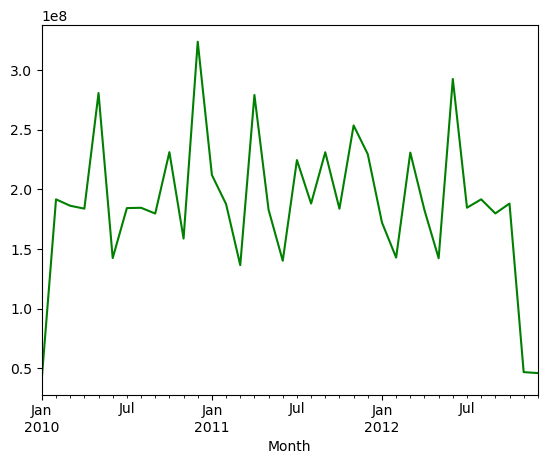

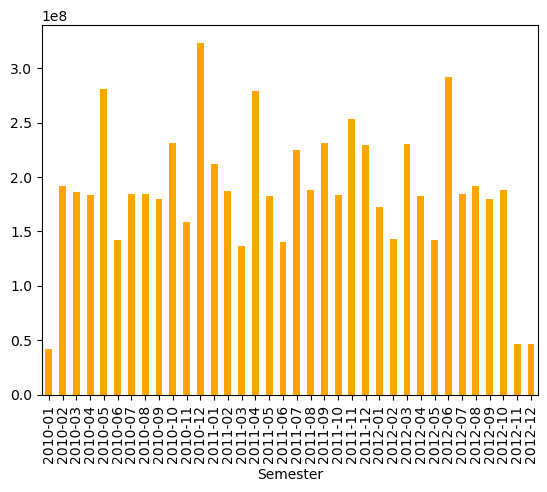

In [25]:
#Providing Monthly view of the sales 
df['Month'] = pd.PeriodIndex(df.Date, freq='M')
df.groupby('Month')['Weekly_Sales'].sum().plot(kind='line',color='green')
import matplotlib.pyplot as plt
plt.show()

#Providing semester view of data 
df['Semester'] = pd.PeriodIndex(df.Date, freq='6M')
df.groupby('Semester')['Weekly_Sales'].sum().plot(kind='bar',color='orange')
import matplotlib.pyplot as plt
plt.show()

## Statistical Model

For Store 1 – Build  prediction models to forecast demand

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

Change dates into days by creating new variable.

Select the model which gives best accuracy.

In [28]:
# Splitting Date and create new columns (Day, Month, and Year)
new_df=df[df['Store']==1]
new_df["Day"]= pd.DatetimeIndex(new_df['Date']).day
new_df['Month'] = pd.DatetimeIndex(new_df['Date']).month
new_df['Year'] = pd.DatetimeIndex(new_df['Date']).year
new_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,quarter,Month,Semester,Day,Year
0,1,05-02-2010,1643690,0,42.31,2.572,211.096358,8.106,2010Q2,5,2010-05,2,2010
1,1,12-02-2010,1641957,1,38.51,2.548,211.242170,8.106,2010Q4,12,2010-12,2,2010
2,1,19-02-2010,1611968,0,39.93,2.514,211.289143,8.106,2010Q1,2,2010-02,19,2010
3,1,26-02-2010,1409727,0,46.63,2.561,211.319643,8.106,2010Q1,2,2010-02,26,2010
4,1,05-03-2010,1554806,0,46.50,2.625,211.350143,8.106,2010Q2,5,2010-05,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1,28-09-2012,1437059,0,76.08,3.666,222.981658,6.908,2012Q3,9,2012-09,28,2012
139,1,05-10-2012,1670785,0,68.55,3.617,223.181477,6.573,2012Q2,5,2012-05,10,2012
140,1,12-10-2012,1573072,0,62.99,3.601,223.381296,6.573,2012Q4,12,2012-12,10,2012
141,1,19-10-2012,1508068,0,67.97,3.594,223.425723,6.573,2012Q4,10,2012-10,19,2012


In [45]:
#scaling the data 
x=new_df.drop(['Weekly_Sales','Date','Semester','quarter','Month'],axis=1)
y=new_df.Weekly_Sales.values
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[-1.69397911, -0.27420425, -0.99513556, -1.71379998,  1.00417522,
         0.05696366],
       [-1.69397911,  3.64691651, -1.20117022, -1.76608938,  1.00788038,
         0.05696366],
       [-1.69397911, -0.27420425, -1.12417832, -1.84016603,  1.009074  ,
         0.05696366],
       ...,
       [ 1.69397911, -0.27420425, -0.33582468,  1.39741931,  0.52724129,
         0.35604577],
       [ 1.69397911, -0.27420425, -0.22738539,  1.32987884,  0.52733249,
         0.35604577],
       [ 1.69397911, -0.27420425, -0.09834264,  1.14032976,  0.52677459,
         0.35604577]])

In [46]:
from sklearn.model_selection import train_test_split

# feature extraction
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.20)

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
rm=RandomForestRegressor(n_estimators = 1000)
rm.fit(x_train,y_train)
ypred=rm.predict(x_test)
r2_score(y_test,ypred)*100

93.75673888356029

## As we can see for only one store the accuracy is not that uptomark for both the model let's apply it on whole dataset.

In [50]:
new_df=df
new_df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,quarter,Month,Semester
0,1,05-02-2010,1643690,0,42.31,2.572,211.096358,8.106,2010Q2,2010-05,2010-05
1,1,12-02-2010,1641957,1,38.51,2.548,211.242170,8.106,2010Q4,2010-12,2010-12
2,1,19-02-2010,1611968,0,39.93,2.514,211.289143,8.106,2010Q1,2010-02,2010-02
3,1,26-02-2010,1409727,0,46.63,2.561,211.319643,8.106,2010Q1,2010-02,2010-02
4,1,05-03-2010,1554806,0,46.50,2.625,211.350143,8.106,2010Q2,2010-05,2010-05
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173,0,64.88,3.997,192.013558,8.684,2012Q3,2012-09,2012-09
6431,45,05-10-2012,733455,0,64.89,3.985,192.170412,8.667,2012Q2,2012-05,2012-05
6432,45,12-10-2012,734464,0,54.47,4.000,192.327265,8.667,2012Q4,2012-12,2012-12
6433,45,19-10-2012,718125,0,56.47,3.969,192.330854,8.667,2012Q4,2012-10,2012-10


In [51]:
#scaling the data 
x=new_df.drop(['Weekly_Sales','Date','Semester','quarter','Month'],axis=1).values
y=new_df.Weekly_Sales.values
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)
x_scaled

array([[-1.69397911, -0.27420425, -0.99513556, -1.71379998,  1.00417522,
         0.05696366],
       [-1.69397911,  3.64691651, -1.20117022, -1.76608938,  1.00788038,
         0.05696366],
       [-1.69397911, -0.27420425, -1.12417832, -1.84016603,  1.009074  ,
         0.05696366],
       ...,
       [ 1.69397911, -0.27420425, -0.33582468,  1.39741931,  0.52724129,
         0.35604577],
       [ 1.69397911, -0.27420425, -0.22738539,  1.32987884,  0.52733249,
         0.35604577],
       [ 1.69397911, -0.27420425, -0.09834264,  1.14032976,  0.52677459,
         0.35604577]])

In [52]:
from sklearn.model_selection import train_test_split

# feature extraction
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.20)

In [54]:
from sklearn.ensemble import RandomForestRegressor
rm=RandomForestRegressor(n_estimators = 1000)
rm.fit(x_train,y_train)
ypred=rm.predict(x_test)
r2_score(y_test,ypred)*100

93.74589372823414